In [170]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd

In [171]:
df=pd.read_csv('datasets/Diabetes.csv')
df

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [173]:
# input output selection:
x=df.drop(columns=['diabetes'])
y=df['diabetes']

In [174]:
# train test split:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)

In [183]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(8,)),  # Adjust input shape based on your features
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

C:\Users\abdul saboor\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [184]:

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [198]:
history = model.fit(x_train, y_train, epochs=50, batch_size=50, validation_split=0.2)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.8515 - loss: 0.3228 - val_accuracy: 0.7236 - val_loss: 0.8638
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8733 - loss: 0.3013 - val_accuracy: 0.7073 - val_loss: 0.8479
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.8732 - loss: 0.3286 - val_accuracy: 0.7317 - val_loss: 0.8951
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8155 - loss: 0.3552 - val_accuracy: 0.7398 - val_loss: 0.9103
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8250 - loss: 0.3743 - val_accuracy: 0.7398 - val_loss: 0.8599
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8857 - loss: 0.2913 - val_accuracy: 0.7317 - val_loss: 0.9069
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8485 - loss: 0.3455 - val_accuracy: 0.7236 - val_loss: 0.8848
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8274 - loss: 0.3518 - val_accuracy: 0.7154 - v

In [199]:

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7394 - loss: 0.7749 


In [200]:
print("accuracy:",test_accuracy)

accuracy: 0.7272727489471436


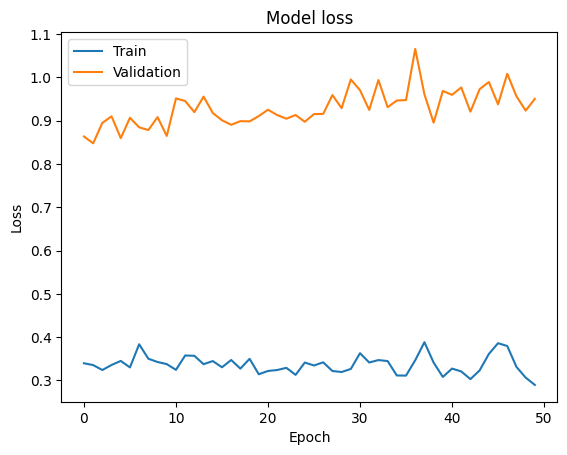

In [201]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
